## 一、安装MMDetection3.x

在开始之前，你需要新建一个虚拟环境，    
`conda create -n 改为虚拟环境名称 python=3.7`   
然后将jupyter-notebook接入。 (如果搜索不到先重启ide)

In [1]:
#确保当前在MMDetection根目录之下
!ls

CITATION.cff  mmdet				      requirements.txt
configs       MMDetection3.x新手保姆级安装指南.ipynb  resources
demo	      model-index.yml			      setup.cfg
docker	      pytest.ini			      setup.py
docs	      README.md				      tests
LICENSE       README_zh-CN.md			      tools
MANIFEST.in   requirements


In [2]:
# 切换当前分支至3.x分支
!git checkout 3.x
# 检查当前所在分支，确保在3.x
!git branch -a

分支 '3.x' 设置为跟踪来自 'origin' 的远程分支 '3.x'。
切换到一个新分支 '3.x'
* 3.x
  master
  remotes/origin/3.x
  remotes/origin/HEAD -> origin/master
  remotes/origin/dev
  remotes/origin/dev-3.x
  remotes/origin/fix_pat_ci
  remotes/origin/master
  remotes/origin/refactor-detr
  remotes/origin/test-3.0.0rc0
  remotes/origin/yolov4


## 1.1 基础依赖安装

In [3]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Mon_Sep_13_19:13:29_PDT_2021
Cuda compilation tools, release 11.5, V11.5.50
Build cuda_11.5.r11.5/compiler.30411180_0
gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



若第一条信息显示找不到信息，请先确保已安装cuda，若安装后仍未找到，按照如下操作：

In [4]:
!cd /usr/local && ls

bin   cuda-11.5  etc	include  man	Qt-5.6.3  share  sunlogin
cuda  cuda-11.7  games	lib	 nginx	sbin	  src


你在上面看到了多个cuda，此时我们可选择一种（如cuda11.5），随后在终端中输入：    
gedit ~/.bashrc     
打开文件后，在最后添加如下信息：（你需要把11.5改成你电脑中的cuda版本）      
export PATH="/usr/local/cuda-11.5/bin:$PATH"        
export LD_LIBRARY_PATH="/usr/lcoal/cuda-11.5/lib64:$LD_LIBRARY_PATH"       
保存后退出，在终端中输入：
source ~/.bashrc    
重启jupyter notebook再次运行即可。

如果操作后还未看到，请确认在系统shell中能够使用nvcc。   
然后执行下列操作直至能看到cuda：

In [2]:
# 检查当前环境路径
import os
os.environ["PATH"]

'/home/sanbu/anaconda3/envs/mmlab2/bin:/home/sanbu/.local/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin'

In [4]:
# 增加cuda对应路径
os.environ["PATH"] += ":/usr/local/cuda-11.5/bin"
print(os.environ["PATH"])

'/home/sanbu/anaconda3/envs/mmlab2/bin:/home/sanbu/.local/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/usr/local/cuda-11.5/bin'

前往官网，选择适当版本的pytorch安装至当前虚拟环境下：
https://pytorch.org/get-started/locally/

In [5]:
# 此处以我的版本为例，安装cuda11.3支持的pytorch
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113


In [1]:
# Check PyTorch installation
import torch, torchvision
print(torch.__version__)
print(torch.cuda.is_available())

1.12.1+cu113
True


## 1.2 MMDet安装

In [2]:
# 使用 MIM 安装 MMEngine 和 MMCV
!pip install -U openmim
!mim install mmengine
# 根据需要换源加快下载速度
!mim install "mmcv>=2.0.0rc1"  # -i  https://pypi.tuna.tsinghua.edu.cn/simple/


/home/sanbu/anaconda3/envs/mmlab2/lib/python3.7/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.12.0/index.html
/home/sanbu/anaconda3/envs/mmlab2/lib/python3.7/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.12.0/index.html


In [3]:
# 安装 MMDetection
# 方案 1. 如果你基于 MMDetection 框架开发自己的任务，建议从源码安装
! pip install -v -e .
# "-v" 指详细说明，或更多的输出
# "-e" 表示在可编辑模式下安装项目，因此对代码所做的任何本地修改都会生效，从而无需重新安装。

# 方案 2. 如果你将 mmdet 作为依赖或第三方 Python 包，使用 MIM 安装 !mim install "mmdet>=3.0.0rc0"



Using pip 22.3 from /home/sanbu/anaconda3/envs/mmlab2/lib/python3.7/site-packages/pip (python 3.7)
Obtaining file:///home/sanbu/%E5%9B%BE%E7%89%87/mmdetection
  Preparing metadata (setup.py) ...   Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-t81dc_2i/mmdet.egg-info
  writing /tmp/pip-pip-egg-info-t81dc_2i/mmdet.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-info-t81dc_2i/mmdet.egg-info/dependency_links.txt
  writing requirements to /tmp/pip-pip-egg-info-t81dc_2i/mmdet.egg-info/requires.txt
  writing top-level names to /tmp/pip-pip-egg-info-t81dc_2i/mmdet.egg-info/top_level.txt
  writing manifest file '/tmp/pip-pip-egg-info-t81dc_2i/mmdet.egg-info/SOURCES.txt'
  reading manifest file '/tmp/pip-pip-egg-info-t81dc_2i/mmdet.egg-info/SOURCES.txt'
  reading manifest template 'MANIFEST.in'
  adding license file 'LICENSE'
  writing manifest file '/tmp/pip-pip-egg-info-t81dc_2i/mmdet.egg-info/SOURCES.txt'
done
  Running setup.py 

In [4]:
#确保安装成功
import mmdet
print(mmdet.__version__)

3.0.0rc3


In [1]:
# 若出现问题，你可以以如下方式收集环境信息，提交给开发人员
from mmdet.utils import collect_env
collect_env()

OrderedDict([('sys.platform', 'linux'),
             ('Python',
              '3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 06:08:21) [GCC 9.4.0]'),
             ('CUDA available', True),
             ('numpy_random_seed', 2147483648),
             ('GPU 0', 'NVIDIA GeForce RTX 3080'),
             ('CUDA_HOME', '/usr/local/cuda-11.5'),
             ('NVCC', 'Cuda compilation tools, release 11.5, V11.5.50'),
             ('GCC', 'gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0'),
             ('PyTorch', '1.12.1+cu113'),
             ('PyTorch compiling details',
              'PyTorch built with:\n  - GCC 9.3\n  - C++ Version: 201402\n  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications\n  - Intel(R) MKL-DNN v2.6.0 (Git Hash 52b5f107dd9cf10910aaa19cb47f3abf9b349815)\n  - OpenMP 201511 (a.k.a. OpenMP 4.5)\n  - LAPACK is enabled (usually provided by MKL)\n  - NNPACK is enabled\n  - CPU capability usage: AVX2\n  - CUDA 

## 1.3 验证安装

In [5]:
# mim是个神奇的工具，不仅能为我们自动安装框架，还能下载模型和对应配置
!mim download mmdet --config yolov3_mobilenetv2_8xb24-320-300e_coco --dest ./checkpoints
# 确保出现了py和pth后缀两个文件：
!ls ./checkpoints/

/home/sanbu/anaconda3/envs/mmlab2/lib/python3.7/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
processing yolov3_mobilenetv2_8xb24-320-300e_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MiB 11.5 MB/s eta 0:00:0000:0100:01
Successfully downloaded yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth to /home/sanbu/图片/mmdetection/checkpoints
Successfully dumped yolov3_mobilenetv2_8xb24-320-300e_coco.py to /home/sanbu/图片/mmdetection/checkpoints
yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth
yolov3_mobilenetv2_8xb24-320-300e_coco.py


In [6]:
# 直接验证
!python demo/image_demo.py demo/demo.jpg ./checkpoints/yolov3_mobilenetv2_8xb24-320-300e_coco.py \
    ./checkpoints/yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth \
    --out-file test_result.jpg \
    --device cpu   # 你也可以修改为cuda

local loads checkpoint from path: ./checkpoints/yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth
/home/sanbu/anaconda3/envs/mmlab2/lib/python3.7/site-packages/mmengine/visualization/visualizer.py:170: UserWarning: `Visualizer` backend is not initialized because save_dir is None.
  warnings.warn('`Visualizer` backend is not initialized '


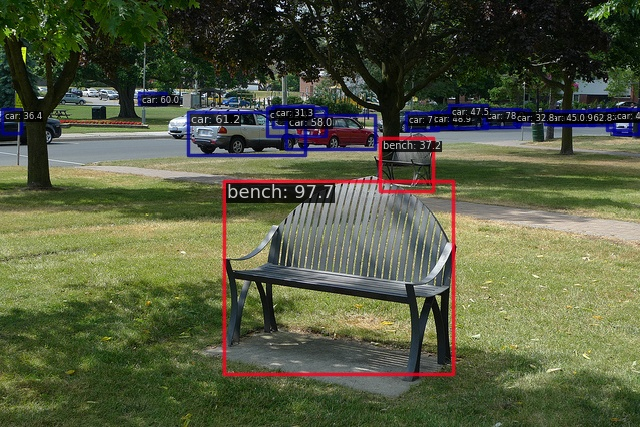

In [4]:
# 展示推理结果
from IPython.display import display, Image
image_path = "test_result.jpg"
display( Image( filename =  image_path ))

## 小作业：
请你根据前面介绍的方法用mim 下载faster-rcnn_r50_fpn_1x_coco的配置和模型文件，       
然后在终端中进行推理得到相同的结果，你可以修改--out-file输出的文件名避免旧图片被覆盖

In [9]:
# 代码调用验证
from mmdet.apis import init_detector, inference_detector
from mmdet.utils import register_all_modules

register_all_modules()
config_file = './checkpoints/yolov3_mobilenetv2_8xb24-320-300e_coco.py'
checkpoint_file = './checkpoints/yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth'
model = init_detector(config_file, checkpoint_file, device='cpu')  # or device='cuda:0'
inference_detector(model, 'demo/demo.jpg')


local loads checkpoint from path: ./checkpoints/yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth


<DetDataSample(

    META INFORMATION
    img_id: 0
    pad_shape: (224, 320)
    img_path: 'demo/demo.jpg'
    scale_factor: (0.5, 0.5011709601873536)
    img_shape: (214, 320)
    batch_input_shape: (224, 320)
    ori_shape: (427, 640)

    DATA FIELDS
    ignored_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([], size=(0, 4))
            labels: tensor([], dtype=torch.int64)
        ) at 0x7f3bb83f6690>
    _gt_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([], size=(0, 4))
            labels: tensor([], dtype=torch.int64)
        ) at 0x7f3bb83f6610>
    _ignored_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([], size=(0, 4))
            labels: tensor([], dtype=torch.int64)
        ) at 0x7f3bb83f6690>
    gt_instances: <InstanceData(
        
          

In [4]:
!mim download mmdet --config faster-rcnn_r50-caffe_fpn_ms-3x_coco --dest ./checkpoints

/home/sanbu/anaconda3/envs/mmlab2/lib/python3.7/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
processing faster-rcnn_r50-caffe_fpn_ms-3x_coco...
faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth exists in /home/sanbu/mmdetection3.x/mmdetection3/checkpoints
Successfully dumped faster-rcnn_r50-caffe_fpn_ms-3x_coco.py to /home/sanbu/mmdetection3.x/mmdetection3/checkpoints


In [10]:
#打印模型
print(model)

YOLOV3(
  (data_preprocessor): DetDataPreprocessor()
  (backbone): MobileNetV2(
    (conv1): ConvModule(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activate): LeakyReLU(negative_slope=0.1, inplace=True)
    )
    (layer1): Sequential(
      (0): InvertedResidual(
        (drop_path): Identity()
        (depthwise_conv): ConvModule(
          (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (activate): LeakyReLU(negative_slope=0.1, inplace=True)
        )
        (linear_conv): ConvModule(
          (conv): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
    )
    (

In [11]:
# 展示推理结果
# 首先获取推理后参数
from mmdet.apis import init_detector, inference_detector
from mmdet.utils import register_all_modules
from mmdet.registry import VISUALIZERS
import mmcv
register_all_modules()
config_file = './checkpoints/yolov3_mobilenetv2_8xb24-320-300e_coco.py'
checkpoint_file = './checkpoints/yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth'
model = init_detector(config_file, checkpoint_file, device='cuda:0')  # or device='cuda:0'

image = mmcv.imread( "demo/demo.jpg", channel_order='rgb')
result = inference_detector(model, image)

local loads checkpoint from path: ./checkpoints/yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth


In [12]:
#注意：新版取消了api中的show方法，采用VISUALIZERS类构建可视化器实例方可展示
from mmdet.registry import VISUALIZERS
# 注意，不需要运行多次否则会报错，构建一次即可(构建后对象已在当前内存中，如需重新构建请重启jupyter)
visualizer = VISUALIZERS.build(model.cfg.visualizer)
visualizer.dataset_meta = model.dataset_meta

/home/sanbu/anaconda3/envs/mmlab2/lib/python3.7/site-packages/mmengine/visualization/visualizer.py:170: UserWarning: `Visualizer` backend is not initialized because save_dir is None.
  warnings.warn('`Visualizer` backend is not initialized '


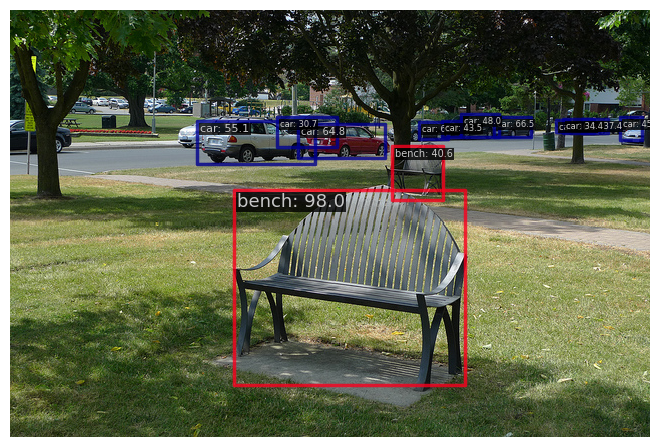

In [13]:
# 展示
# 方法的所有参数在mmdet/visualization/local_visualizer.py
""" def add_datasample(
            self,
            name: str,
            image: np.ndarray,
            data_sample: Optional['DetDataSample'] = None,  #可选参数,默认为None,否则DetDataSample
            draw_gt: bool = True,   #gt 真实标注信息
            draw_pred: bool = True,   #pred 推理信息
            show: bool = False,
            wait_time: float = 0,
            out_file: Optional[str] = None,   ##可选参数,可用于选择输出文件地址
            pred_score_thr: float = 0.3,    
            step: int = 0) -> None:
            """
visualizer.add_datasddddample(
    'result',
    image,
    data_sample=result,
    draw_gt = None,
    show=None,
    wait_time=0,
)
visualizer.show()

# 完成
恭喜你！已经成功通过MMDetection3.x版本新手教程~